In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#implement a series of machine learning regressors to predict the grade of a student based on EDA information
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

In [3]:
#read the data
df_final = pd.read_csv('./dataframes/All_Subjects/ML/Processed_EDA_midterm_2_Win_120_Stats.csv', index_col=0)

In [4]:
df_final.head()

,Subject,Grade,Exam,EDA_Tonic_mean,EDA_Phasic_mean,SCR_Amplitude_mean,SCR_RiseTime_mean,SCR_Amplitude_RiseTime_Ratio_mean,EDA_Phasic_std,EDA_Phasic_AUC,SCR_Peaks_sum
0,1,82.0,2.0,0.189992,-0.000039,0.006172,0.148148,0.006119,0.009553,-0.004510,9.0
1,2,85.0,2.0,0.175544,0.000090,0.032732,0.378704,0.041943,0.022402,0.011956,38.0
2,3,90.0,2.0,0.667212,0.000198,0.084867,0.889675,0.118244,0.056433,0.025240,155.0
3,4,77.0,2.0,1.120796,0.001062,0.264015,0.760206,0.371670,0.240909,0.126678,192.0
4,5,77.0,2.0,0.567663,0.002158,0.094870,1.001162,0.110859,0.045047,0.258409,84.0


In [5]:
print(f"The min grade is {df_final.Grade.min()}, \n the max is {df_final.Grade.max()}, \n the mean is {df_final.Grade.mean()}, \n and the std is {df_final.Grade.std()}")

The min grade is 33.0, 
 the max is 90.0, 
 the mean is 71.19, 
 and the std is 19.631810405512265


In [6]:
#drop the student ID
df_final = df_final.drop(columns=['Subject'])

#split the data into features and target
X = df_final.drop(columns=['Grade'])
y = df_final['Grade']
#normalize the target
y = y/y.max()

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#use PCA to reduce the number of features
#from sklearn.decomposition import PCA
#pca = PCA(n_components=0.95)
#X_train_scaled = pca.fit_transform(X_train_scaled)
#X_test_scaled = pca.transform(X_test_scaled)

In [7]:
#implement a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = lin_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.028026606850740717
RMSE: 0.16741148960194074
R^2: -0.08699177864709795
AIC: -53.49201950668558


In [8]:
#implement a random forest regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = rf_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.019701845679012363
RMSE: 0.14036326328143117
R^2: 0.23587809286680395
AIC: -60.540859166735885


In [9]:
#implement a gradient boosting regressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = gb_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.021774294831138324
RMSE: 0.14756115624085603
R^2: 0.15549964384433412
AIC: -58.54050282202883


In [10]:
#implement a support vector regressor
svr = SVR()
svr.fit(X_train_scaled, y_train)

#predict the target
y_pred = svr.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.024725811803019623
RMSE: 0.1572444332973973
R^2: 0.04102718201338795
AIC: -55.99815137450841


In [11]:
#implement a polynomial regression model
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = poly_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.11443965367328975
RMSE: 0.33828930469834506
R^2: -3.438459616484023
AIC: -25.35415274156105


In [12]:
from sklearn.linear_model import Ridge

#implement a polynomial regression model with a ridge regularization and grid search
poly_reg = make_pipeline(PolynomialFeatures(), Ridge())
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'ridge__solver': ['lsqr', 'sparse_cg', 'sag', 'saga'],
              'ridge__max_iter': [100, 1000, 10000]}
grid = GridSearchCV(poly_reg, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid.best_params_

Mean Squared Error: 0.028442724847119676
RMSE: 0.16864971048632035
R^2: -0.10313061569647419
AIC: -53.197257365193906


{'polynomialfeatures__degree': 1,
 'ridge__alpha': 10,
 'ridge__max_iter': 1000,
 'ridge__solver': 'sag'}

In [13]:
#implement a gradient boosting regressor with grid search
param_grid = {'n_estimators': [100, 200, 300], 
              'max_depth': [3, 4, 5],
              'learning_rate': [0.01, 0.1, 0.5],
              'subsample': [0.8, 0.9, 1.0],
              'max_features': [0.8, 0.9, 1.0]}
gb_reg = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.02606929931002653
RMSE: 0.1614599000062447
R^2: -0.011079014166867518
AIC: -54.939938573009144


In [14]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 1.0,
 'n_estimators': 300,
 'subsample': 0.8}

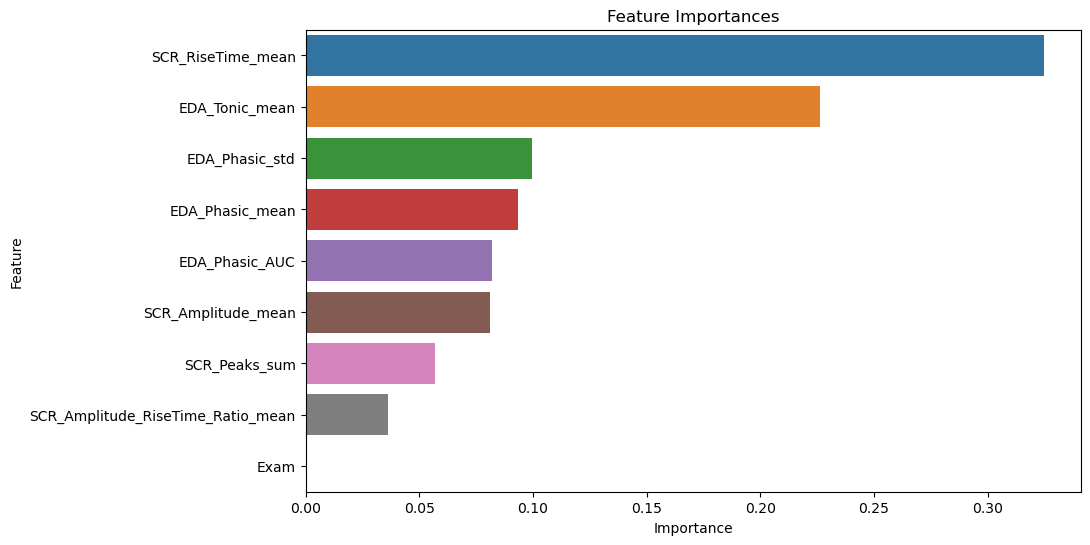

In [15]:
#plot the feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
#get the pca columns
#pca_columns = ['PCA' + str(i) for i in range(1, len(feature_importances) + 1)]
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

In [16]:
#implement a random forest regressor with grid search

param_grid = {'n_estimators': [100, 200, 300],
                'max_features': [None, 'sqrt', 'log2'],
                'max_depth': [3, 4, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],}
rf_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1, verbose=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid_search.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Mean Squared Error: 0.019356982592193393
RMSE: 0.13912937357795224
R^2: 0.24925335952421512
AIC: -60.89404134244104


{'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

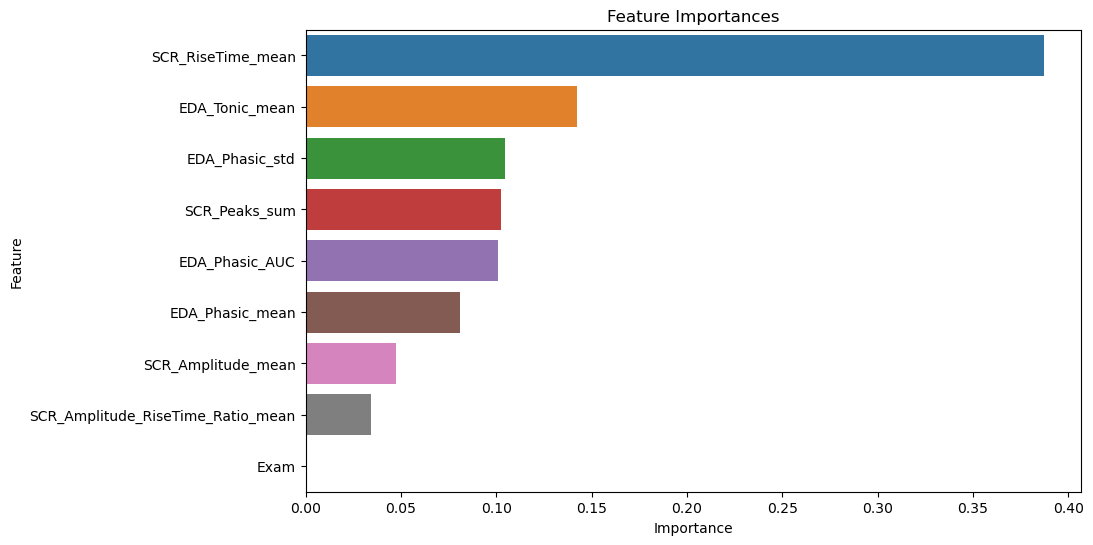

In [17]:
#plot the feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

In [18]:
#implement a support vector regressor with grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid_search.best_params_

Mean Squared Error: 0.029951782918201907
RMSE: 0.17306583405803094
R^2: -0.16165834705914817
AIC: -52.16332852738812


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

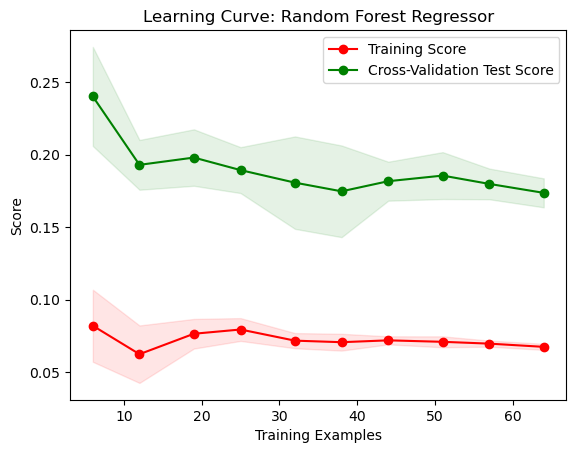

In [19]:
#implement a learning curve for the random forest regressor
train_sizes, train_scores, test_scores = learning_curve(rf_reg, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve: Random Forest Regressor')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Test Score')
plt.legend(loc='best')
plt.show()

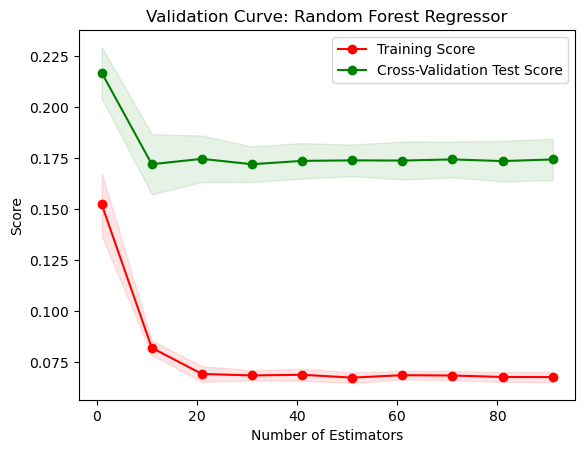

In [20]:
#implement a validation curve for the random forest regressor
param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(rf_reg, X_train_scaled, y_train, param_name='n_estimators', param_range=param_range, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve: Random Forest Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-Validation Test Score')
plt.legend(loc='best')
plt.show()


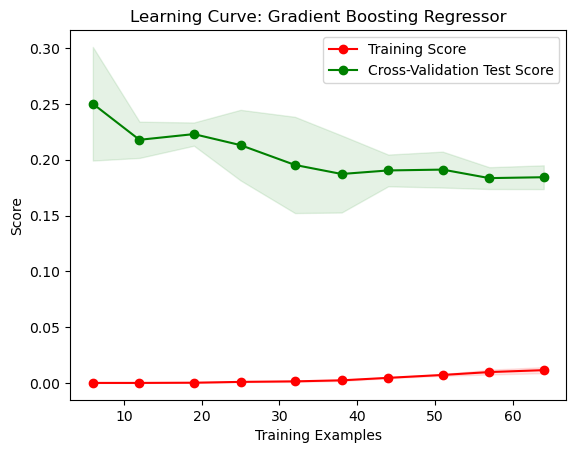

In [21]:
#implement a learning curve for the gradient boosting regressor
train_sizes, train_scores, test_scores = learning_curve(gb_reg, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve: Gradient Boosting Regressor')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Test Score')
plt.legend(loc='best')
plt.show()

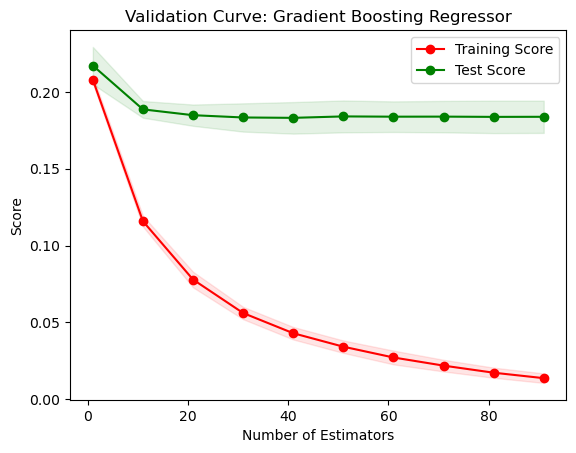

In [22]:
#implement a validation curve for the gradient boosting regressor
param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(gb_reg, X_train_scaled, y_train, param_name='n_estimators', param_range=param_range, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve: Gradient Boosting Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Test Score')
plt.legend(loc='best')
plt.show()

In [23]:
#implement a multi-layer perceptron regressor
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(random_state=42, max_iter=100000, hidden_layer_sizes=(128, 128))
mlp_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = mlp_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.03452051499166089
RMSE: 0.18579697250402355
R^2: -0.33885333285030095
AIC: -49.32402988464328


In [24]:
#implement a multi-layer perceptron regressor with grid search
param_grid = {'hidden_layer_sizes': [(64, 64), (128, 128), (256, 256)],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
mlp_reg = MLPRegressor(random_state=42, max_iter=100000)
grid_search = GridSearchCV(mlp_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid_search.best_params_

Mean Squared Error: 0.025216217518357398
RMSE: 0.15879615082978996
R^2: 0.022007149241935253
AIC: -55.6053587827996


{'alpha': 1, 'hidden_layer_sizes': (64, 64)}

In [25]:
# implement a voting regressor
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators=[('rf', rf_reg), ('gb', gb_reg), ('mlp', mlp_reg)])
voting_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = voting_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.019086347521648277
RMSE: 0.13815334784813676
R^2: 0.2597497459852235
AIC: -61.175639779116494


In [26]:
# implement a stacking regressor
from sklearn.ensemble import StackingRegressor
stacking_reg = StackingRegressor(estimators=[('rf', rf_reg), ('gb', gb_reg)], final_estimator=mlp_reg)
stacking_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = stacking_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.018646088258355002
RMSE: 0.13655068018268895
R^2: 0.27682488469971855
AIC: -61.642377995043276






Epoch 1/500

3/3 [==============================] - 1s 129ms/step - loss: 0.7914 - val_loss: 0.6333
Epoch 2/500
3/3 [==============================] - 0s 35ms/step - loss: 0.4410 - val_loss: 0.3748
Epoch 3/500
3/3 [==============================] - 0s 61ms/step - loss: 0.4036 - val_loss: 0.2836
Epoch 4/500
3/3 [==============================] - 0s 32ms/step - loss: 0.4257 - val_loss: 0.2619
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 0.3692 - val_loss: 0.2748
Epoch 6/500
3/3 [==============================] - 0s 22ms/step - loss: 0.2951 - val_loss: 0.3136
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 0.2595 - val_loss: 0.3445
Epoch 8/500
3/3 [==============================] - 0s 18ms/step - loss: 0.2540 - val_loss: 0.3302
Epoch 9/500
3/3 [==============================] - 0s 16ms/step - loss: 0.2298 - val_loss: 0.2685
Epoch 10/500
3/3 [==============================] - 0s 29ms/step - loss: 0.1842 - val_loss: 0.2375
Epoch 11/500


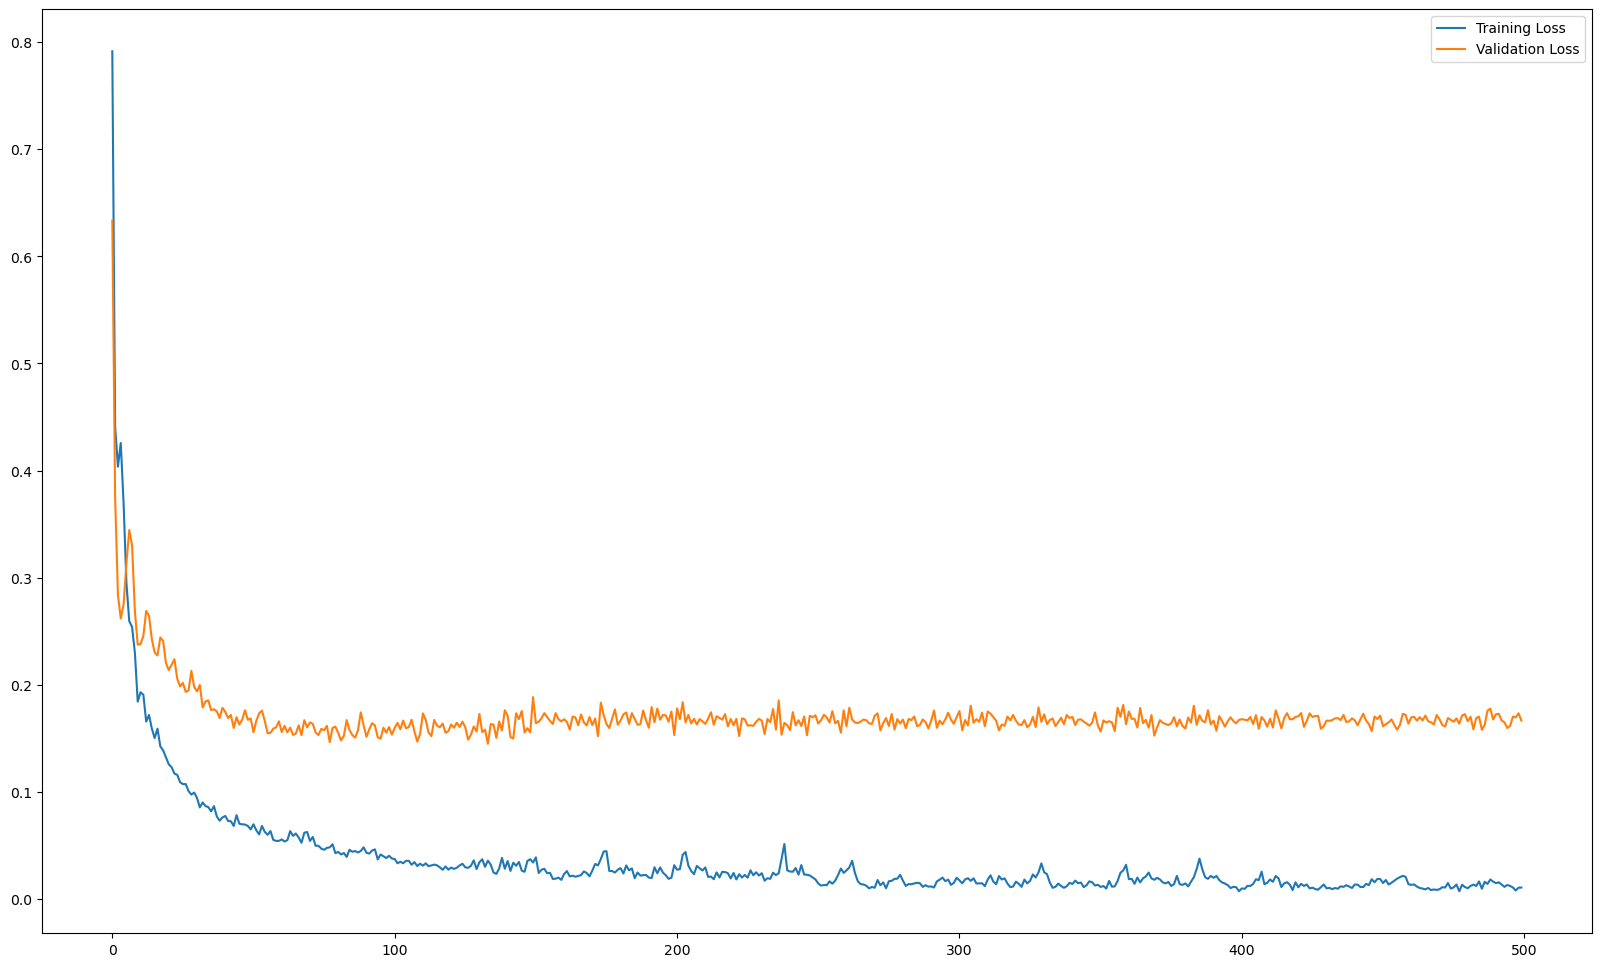

1/1 [==============================] - 0s 100ms/step
Mean Squared Error: 0.036454836663491766
RMSE: 0.1909314973059494
R^2: -0.4138746069466157
AIC: -48.233622724610186


In [27]:
#implement a CNN regressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


#reshape the data
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

#implement a CNN regressor
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

#implement early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

#implement model checkpoint
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

#fit the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=32, callbacks=[model_checkpoint])

#plot the learning curves
plt.figure(figsize=(20, 12))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#plot the learning curves with plotly
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Learning Curves', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()

#load the best model
model = load_model('best_model.h5')

#predict the target
y_pred = model.predict(X_test_reshaped)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Epoch 1/500
3/3 [==============================] - 2s 174ms/step - loss: 0.6119 - val_loss: 0.6918
Epoch 2/500
3/3 [==============================] - 0s 29ms/step - loss: 0.5124 - val_loss: 0.5618
Epoch 3/500
3/3 [==============================] - 0s 33ms/step - loss: 0.4361 - val_loss: 0.4652
Epoch 4/500
3/3 [==============================] - 0s 32ms/step - loss: 0.3669 - val_loss: 0.3744
Epoch 5/500
3/3 [==============================] - 0s 32ms/step - loss: 0.3357 - val_loss: 0.3253
Epoch 6/500
3/3 [==============================] - 0s 30ms/step - loss: 0.3084 - val_loss: 0.2974
Epoch 7/500
3/3 [==============================] - 0s 30ms/step - loss: 0.2814 - val_loss: 0.2817
Epoch 8/500
3/3 [==============================] - 0s 30ms/step - loss: 0.2534 - val_loss: 0.2596
Epoch 9/500
3/3 [==============================] - 0s 32ms/step - loss: 0.2368 - val_loss: 0.2323
Epoch 10/500
3/3 [==============================] - 0s 35ms/step - loss: 0.2202 - val_loss: 0.2097
Epoch 11/500
3/3 [

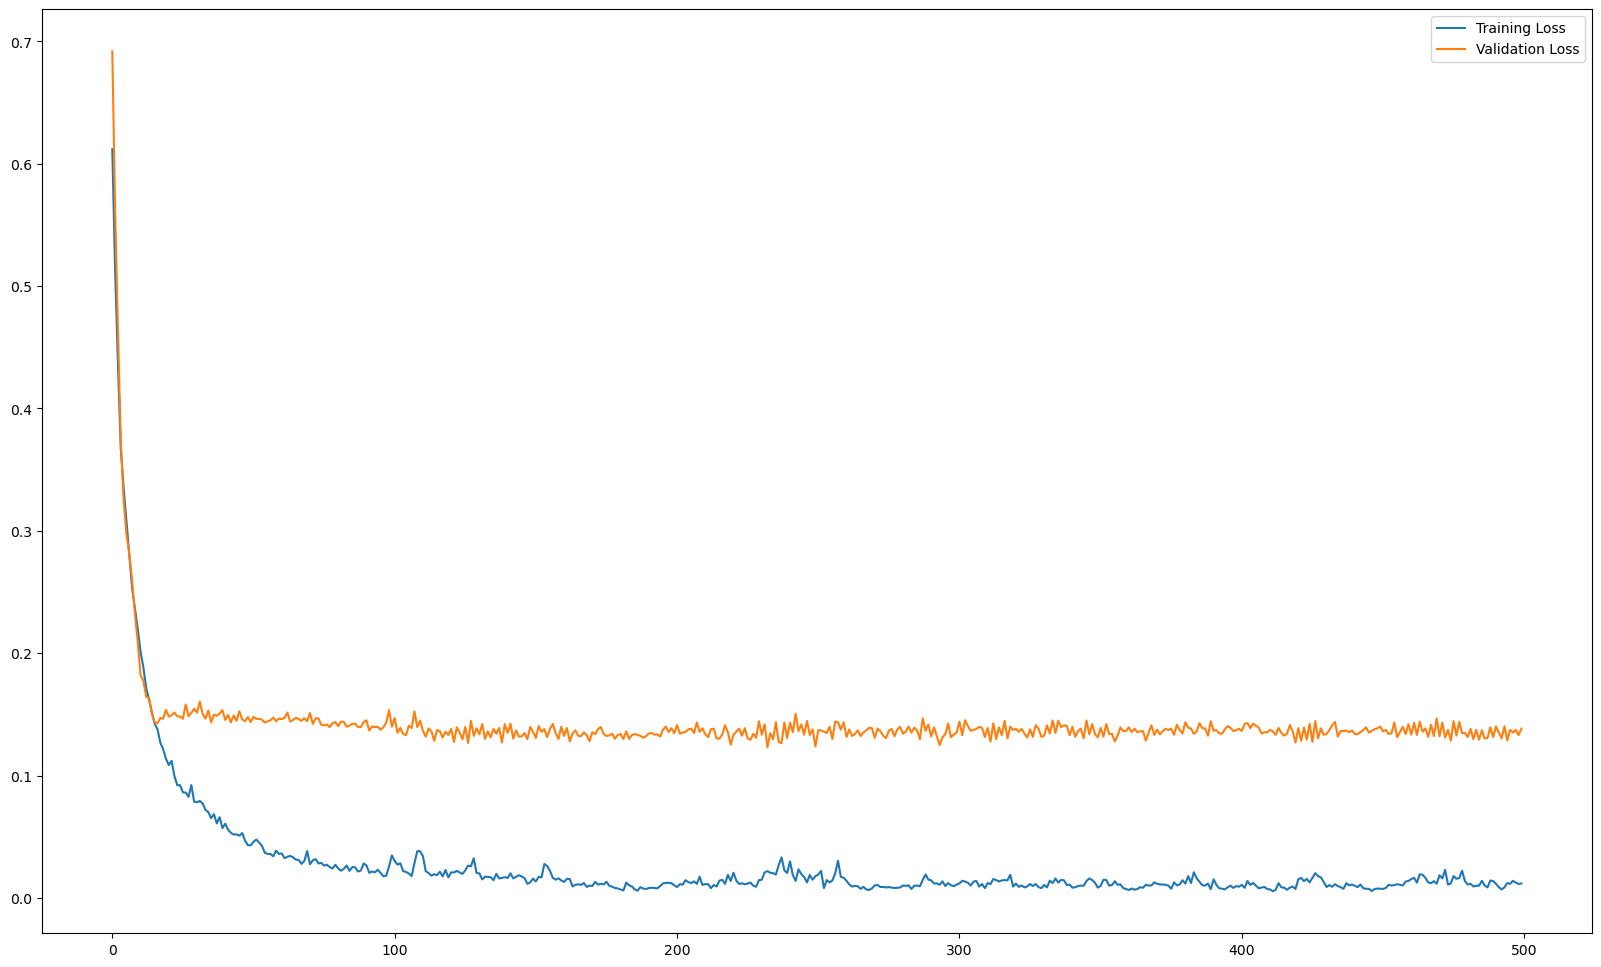

1/1 [==============================] - 0s 190ms/step
Mean Squared Error: 0.028193722919410642
RMSE: 0.16790986546183237
R^2: -0.09347325511306681
AIC: -53.37311834650994


In [28]:
#implement a RNN regressor
model = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

#implement model checkpoint
model_checkpoint = ModelCheckpoint('best_model_rnn.h5', monitor='val_loss', mode='min', save_best_only=True)

#fit the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=32, callbacks=[model_checkpoint])

#plot the learning curves
plt.figure(figsize=(20, 12))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#plot the learning curves with plotly
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Learning Curves', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()

#load the best model
model = load_model('best_model_rnn.h5')

#predict the target
y_pred = model.predict(X_test_reshaped)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Epoch 1/500
3/3 [==============================] - 2s 181ms/step - loss: 0.7872 - val_loss: 0.8632
Epoch 2/500
3/3 [==============================] - 0s 33ms/step - loss: 0.7418 - val_loss: 0.8257
Epoch 3/500
3/3 [==============================] - 0s 32ms/step - loss: 0.6949 - val_loss: 0.7873
Epoch 4/500
3/3 [==============================] - 0s 35ms/step - loss: 0.6476 - val_loss: 0.7456
Epoch 5/500
3/3 [==============================] - 0s 32ms/step - loss: 0.5982 - val_loss: 0.6980
Epoch 6/500
3/3 [==============================] - 0s 32ms/step - loss: 0.5487 - val_loss: 0.6416
Epoch 7/500
3/3 [==============================] - 0s 34ms/step - loss: 0.4917 - val_loss: 0.5720
Epoch 8/500
3/3 [==============================] - 0s 38ms/step - loss: 0.4481 - val_loss: 0.4979
Epoch 9/500
3/3 [==============================] - 0s 44ms/step - loss: 0.3997 - val_loss: 0.4333
Epoch 10/500
3/3 [==============================] - 0s 39ms/step - loss: 0.3717 - val_loss: 0.3553
Epoch 11/500
3/3 [

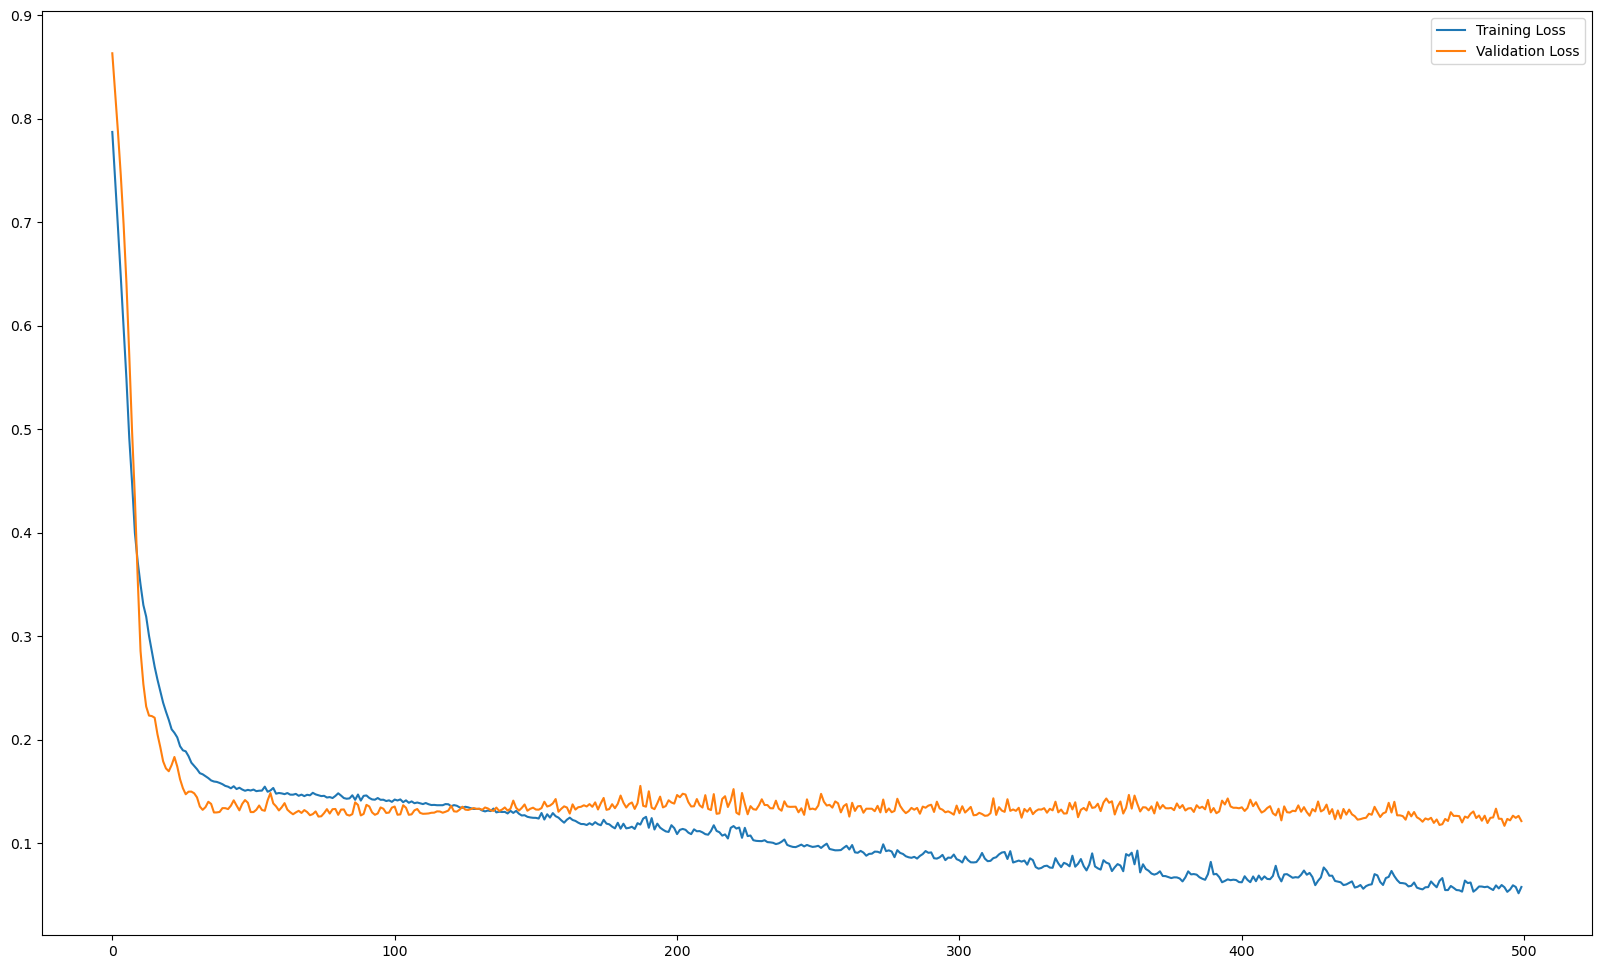

1/1 [==============================] - 0s 147ms/step
Mean Squared Error: 0.024042642156499806
RMSE: 0.15505689973845022
R^2: 0.06752342514203702
AIC: -56.55852537356124


In [29]:
#implement a LSTM regressor
model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

#implement model checkpoint
model_checkpoint = ModelCheckpoint('best_model_lstm.h5', monitor='val_loss', mode='min', save_best_only=True)

#fit the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=32, callbacks=[model_checkpoint])

#plot the learning curves
plt.figure(figsize=(20, 12))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#plot the learning curves with plotly
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Learning Curves', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()

#load the best model
model = load_model('best_model_lstm.h5')

#predict the target
y_pred = model.predict(X_test_reshaped)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)